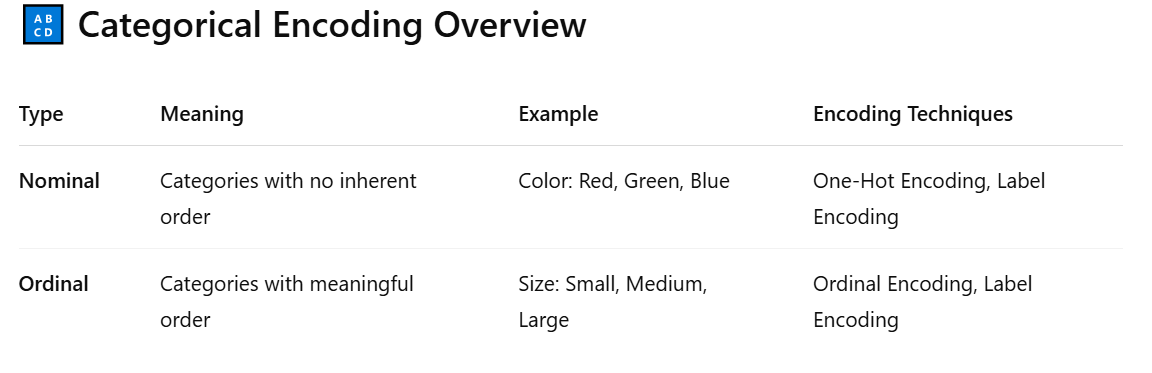

Ordinal Categoriacal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder



In [16]:
df = pd.read_csv("/content/customer.csv",usecols=[2,3,4], header=0)
df.sample(5)

,review,education,purchased
23,Good,School,No
47,Good,PG,Yes
2,Good,PG,No
15,Poor,UG,No
31,Poor,School,Yes


In [17]:
x = df.iloc[:,:-1]
x

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG
5,Average,School
6,Good,School
7,Poor,School
8,Average,UG
9,Good,UG


In [20]:
y = df.iloc[:,2]
y

,purchased
0,No
1,No
2,No
3,No
4,No
5,Yes
6,No
7,Yes
8,No
9,Yes


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape,x_test.shape

((40, 2), (10, 2))

In [24]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
x_train_oe= oe.fit_transform(x_train)
x_test_oe = oe.transform(x_test)

In [29]:
x_train_oe = pd.DataFrame(x_train_oe, columns= x_train.columns)

In [30]:
x_train_oe

,review,education
0,0.0,0.0
1,1.0,0.0
2,1.0,1.0
3,2.0,0.0
4,2.0,0.0
5,0.0,2.0
6,1.0,1.0
7,1.0,1.0
8,0.0,0.0
9,1.0,2.0


In [31]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le=le.transform(y_test)

In [33]:
y_train_le

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

One - hot Encoding

One-hot encoding converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction.

Suppose we have a nominal feature like:

red - 0 , blue - 1, green- 2


Color	Red	Green	Blue

Red	  1	0	0

Green	0	1	0

Blue	0	0	1

Why Drop One Column? (n categories → n−1 columns)

🧮 Reason: To avoid multicollinearity
The presence of all n columns introduces redundancy.

Any one column can be derived from the others

This is called the Dummy Variable Trap — it can confuse models like Linear Regression and inflate variance.



In [37]:
data = pd.read_csv("/content/cars.csv")
data.sample(5)

,brand,km_driven,fuel,owner,selling_price
1121,Maruti,58343,Petrol,First Owner,225000
4117,Skoda,265000,Diesel,Second Owner,300000
1471,Chevrolet,38000,Diesel,First Owner,260000
5193,Hyundai,220000,Petrol,Fourth & Above Owner,220000
702,Maruti,80000,Petrol,Second Owner,225000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [46]:
data['brand'].nunique()

32

In [47]:
data['fuel'].nunique()

4

In [48]:
data['owner'].nunique()

5

ONE - HOT ENCODING THROUGH PANDAS

In [49]:
pd.get_dummies(data , columns=["fuel","owner"])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


K-1 HOT ENCODING

In [50]:
pd.get_dummies(data , columns=["fuel","owner"], drop_first =True) #avoid multicolineraity

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


HOT ENCODING THROUGH SK-LEARN

In [53]:
x= data.iloc[: ,:-1]
x

,brand,km_driven,fuel,owner
0,Maruti,145500,Diesel,First Owner
1,Skoda,120000,Diesel,Second Owner
2,Honda,140000,Petrol,Third Owner
3,Hyundai,127000,Diesel,First Owner
4,Maruti,120000,Petrol,First Owner
...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner
8124,Hyundai,119000,Diesel,Fourth & Above Owner
8125,Maruti,120000,Diesel,First Owner
8126,Tata,25000,Diesel,First Owner


In [55]:
y = data.iloc[:, 4]
y

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8123,320000
8124,135000
8125,382000
8126,290000


In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape,x_test.shape

((6502, 4), (1626, 4))

In [79]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder with unknown category handling
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Fit on train, transform both
x_train_new = ohe.fit_transform(x_train[['fuel', 'owner']])
x_test_new = ohe.transform(x_test[['fuel', 'owner']])


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [63]:
x_train =x_train.iloc[:,:2].values
x_train


array([['Hyundai', 144000],
       ['Hyundai', 35000],
       ['Hyundai', 50000],
       ...,
       ['Chevrolet', 67600],
       ['Audi', 31800],
       ['Ford', 40000]], dtype=object)

In [80]:
x_train_new.shape

(6502, 829)

In [81]:
np.hstack((x_train, x_train_new)).shape

(6502, 831)

ONE0- HOT ENCODING WITH TOP CATEGORIES AND REMAINING AS OTHERS

In [83]:
Counts = data['brand'].value_counts()
Counts

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [84]:
data['brand'].nunique()
threshold =100

In [85]:
repl = Counts[Counts<= threshold].index


In [86]:
pd.get_dummies(data['brand'].replace(repl,'uncommon',)).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
3356,False,False,False,False,False,False,False,False,False,False,False,True,False
5167,False,False,False,False,False,True,False,False,False,False,False,False,False
34,False,False,False,False,False,False,True,False,False,False,False,False,False
7212,False,False,False,False,False,False,False,False,False,False,True,False,False
1402,False,False,False,False,False,False,True,False,False,False,False,False,False
